<div class="alert alert-success">
<font size="5", color = "seagreen"><b>✔️ Комментарий ревьюера в4</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Привет, Виктория :) 
    
Спасибо за работу на проекте и терпение, мы значительно улучшили твой проект, осталось поработать над расчетом и графиками, комментарии в версии в4 оставил
        
Подведем итоги, мы научились и повторили на проекте каким образом:

+ читать тех. задание проекта
+ исследовать неочищенные данные
+ выдвигать гипотезы о пропусках данных и заполнять их значениями
+ принимать решения об удалении некачественных данных
+ находить аномалии в данных и отделять редкие значения
+ соглашаться с наличием пропусков в данных и не забывать об их наличии при фильтрации
+ строить информативные визуализации
+ делить одну выборку на две части
+ находить зависимости и распределения в данных 
+ формировать выводы
        
Навыки отработаны хорошо, проект принят 

<b>Поздравляю с успешно сданным третьим проектом на факультете дата-аналитики Я.Практикум</b>

<div class="alert alert-success">
    <font size="5", color = "seagreen"><b>Успехов в дальнейшей учебе 🤝</b></font><br />

наша беседа в слаке была моей инициативой, для ускорения выполнения проекта, среди остальных ревьюеров это почти не практикуется, все вопросы по проекту оптимально адресовать преподавателю 🤝

<div class="alert alert-success">
<font size="4"><b>Комментарий ревьюера в3</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
    Привет, Виктория :) Спасибо за исправления, оставил подсказки
        
стоит разделить код на более короткие разделы и поработать с графиками
        
иду в слак

<div class="alert alert-success">
<font size="4"><b>Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
    Привет, Виктория :) Спасибо за исправления, оставил подсказки
        
стоит разделить код на более короткие разделы

<div class="alert alert-success">
<font size="4"><b>Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
    Привет, Виктория :) Спасибо, что прислала задание :) Меня зовут Ринат Хисамов и я буду проверять твой проект. Предлагаю обращаться друг к другу на ты. Так нам будет гораздо проще и удобней общаться).

Мои комментарии обозначены пометкой <b>Комментарий ревьюера</b>. Далее в файле сможешь найти их в похожих ячейках (если фон комментария зелёный — всё сделано правильно (✔️), рекомендации таким же цветом. Отдельным цветом — блок ссылок (примеры ниже, 🍕). Оранжевым или светло желтым рекомендации, которые, хоть и не обязательны, но точно сделают ревью лучше. (⚠️); <u> красный комментарий</u>: код, график или вывод стоит переделать (❌)). 

Не удаляй все эти комментарии и постарайся учесть их в ходе выполнения данного проекта. 
Будет замечательно, если добавишь свои комментарии и пояснения✍
        
Поехали 🚀
    <br />
    </font>

</div>

<div style="border:solid steelblue 1px; padding: 20px">
    
<font size="4"><p style="text-align:center"><b>Примеры комментариев </b></p></font>
    
<div style="border:solid steelblue 3px; padding: 20px">
<font size="4"><b>🍕 Пример комментария - совета, здесь м.б. просто ссылка</b></font>
    <br /> 
        <font size="3", color = "black">
<br />
    Тут всего такого разного и вкусного :), есть способы прокачать проект визуализациями (ценит большинство "боссов")  <br /><br />
        <a href="https://pyprog.pro/mpl/mpl_short_guide.html">Краткое руководство по Matplotlib</a>
        На сайте много полезных материалов, мне самому очень помогло в свое время, до сих пор подсматриваю :)


</div>
    
<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
    <font size="3"><b>⚠️ Пример оформления некритичного комментария</b>
    <br /> 
    <font size="2", color = "black">
<br />
    Рекомендации, которые, хоть и не обязательны, но точно сделают ревью лучше
    <br />
    </font>

</div>
    
<div class="alert alert-danger">
<font size="3"><b>❌ Пример оформления комментария к блоку(строке) программного кода (или выводу), который стоит переделать</b></font>
    <br /> 
    <font size="2", color = "black">
<br />
    Отправлен не тот проект, напиши в своих комментариях, что случилось? жду — <b>это пример</b>
    <br />
    </font>

</div>
    
<div class="alert alert-success">
<font size="4"><b>✔️ Пример оформления комментария, который нравится большинству студентов</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
    Круто, молодец, отлично, логично, или — 👌, 👍, или — выводы отвечают на все вопросы к данным и проекту
    <br />
    </font>

</div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
Название, краткое вступление в работу и главная задача зафиксированы. 
        
Четкий план работ и перечень основных задач позволит коллегам быстрее вникнуть в суть проекта, да и самой будет легче  идти к главной цели проекта

### Откройте файл с данными и изучите общую информацию. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


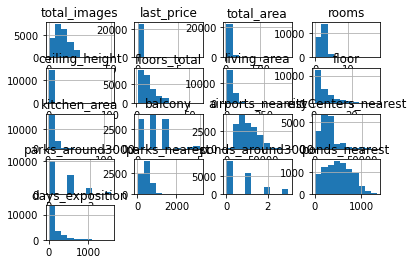

In [53]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv('/datasets/real_estate_data',sep='\t')
data
data.info()
data.hist()
data

In [54]:
# check
# пропущенные значения бары

# check
def pass_value_barh(df):
    (
        (df.isna().mean()*100)
        .to_frame()
        .rename(columns = {0:'space'})
        .query('space > 0')
        .sort_values(by = 'space', ascending = True)
        .plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16)
        .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
    );    

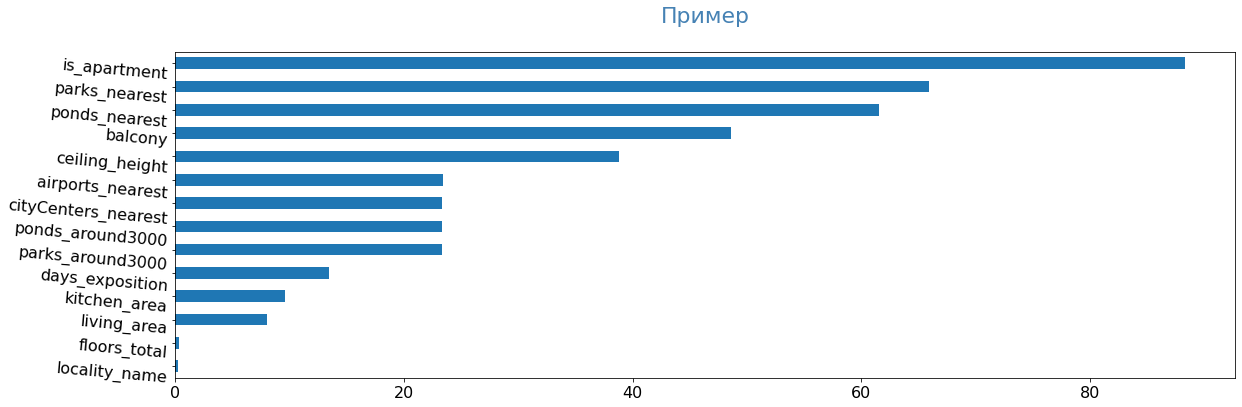

In [55]:
pass_value_barh(data)

<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
<br /> 
<font size="3", color = "black">
<br /> Наглядность представления информации одна из важных составляющих работы дата-аналитика или дата-сайентиста
    


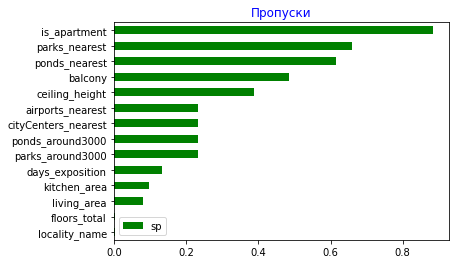

In [56]:
data.isna()
data.isna().sum()

data.isna().sum().max()
def pass_value_barh1(df):
    (
        (data.isna().mean())
        .to_frame()
        .rename(columns={0:'sp'})
        .query('sp>0')
        .sort_values(by ='sp',ascending=True)
        .plot(kind='barh',color='Green')
        .set_title('Пропуски',color='Blue')
    );
pass_value_barh1(data)


### Предобработка данных

In [57]:
#ошибки в заголовках:
data.rename(columns={'cityCenters_nearest': 'city_centers_nearest','ponds_around3000':'ponds_around',
'parks_around3000':'parks_around'},inplace=True)


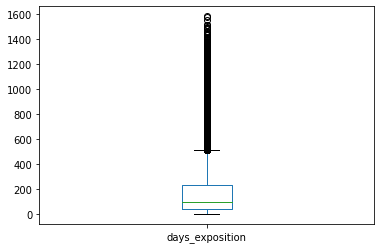

In [58]:
#Найдите и изучите пропущенные значения в столбцах:
data['is_apartment']=data['is_apartment'].fillna(False)
park_mean = data['parks_nearest'].mean()
data['parks_nearest']=data['parks_nearest'].fillna(park_mean)
ceiling_height_median=data['ceiling_height'].median()
data['ceiling_height']=data['ceiling_height'].fillna(ceiling_height_median)
floors_total_mean = data['floors_total'].mean()
data['balcony']=data['balcony'].fillna(0)
data['floors_total']=data['floors_total'].fillna(floors_total_mean)
airoports_nerest_mean = data['airports_nearest'].mean()
data['airports_nearest'] =data['airports_nearest'].fillna(airoports_nerest_mean)
city_centers_nearest_mean= data['city_centers_nearest'].mean()
data['city_centers_nearest'] =data['city_centers_nearest'].fillna(city_centers_nearest_mean)
parks_around_mean =data['parks_around'].mean()
data['parks_around']=data['parks_around'].fillna(parks_around_mean)
ponds_around_mean = data['ponds_around'].mean()
data['ponds_around'] = data['ponds_around'].fillna(ponds_around_mean)
ponds_nearest_mean = data['ponds_nearest'].mean()
data['ponds_nearest'] = data['ponds_nearest'].fillna(ponds_nearest_mean)
data['days_exposition'].plot(kind="box")#установка аномалии:Q3 отличается от медианы на 60 процентов, это не так много
#однако, если мы сбросим данные до 1200 и ниже, то мы получим различие в 33 процента, но потеряем где-то 100 записей..


day_exposition_srez = data[(data['days_exposition']>0) & (data['days_exposition']< 200)]#выборка из не-выбросов
day_exposition_mean = day_exposition_srez['days_exposition'].mean()#среднее из выборки
data['days_exposition'] = data['days_exposition'].fillna(day_exposition_mean)#заполнение пропусков..


In [59]:
#Рассмотрите типы данных в каждом столбце:
data['parks_nearest'] =data['parks_nearest'].astype('int64')
data['floors_total'] =data['floors_total'].astype('int64')
data['balcony'] =data['balcony'].astype('int64')
data['airports_nearest'] =data['airports_nearest'].astype('int64')
data['city_centers_nearest'] =data['city_centers_nearest'].astype('int64')
data['parks_around'] =data['parks_around'].astype('int64')
data['ponds_around'] =data['ponds_around'].astype('int64')
data['ponds_nearest'] =data['ponds_nearest'].astype('int64')
data['last_price'] =data['last_price'].astype('int64')
data['total_area'] =data['total_area'].astype('int64')
data['days_exposition'] =data['days_exposition'].astype('int64')


#### check 1

In [60]:
#Изучите уникальные значения в столбце с названиями и устраните неявные дубликаты.
data['locality_name']=data['locality_name'].replace('поселок Пансионат Зелёный Бор','посёлок Пансионат Зелёный Бор')
data['locality_name']=data['locality_name'].replace('поселок Мурино','посёлок Мурино')
data['locality_name']=data['locality_name'].replace('поселок Мичуринское','посёлок Мичуринское')
data['locality_name']=data['locality_name'].replace('поселок Бугры','посёлок Бугры')
data['locality_name']=data['locality_name'].replace('городской поселок Янино-1','городской посёлок Янино-1')

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера в3</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Разделим блок кода на части для удобства проверки и покажем сколько записей мы теряем

In [61]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  int64  
 2   total_area            23699 non-null  int64  
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  int64  
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [62]:
#Найдите и устраните редкие и выбивающиеся значения. 
data = data[(data['last_price']>12190.0) &(data['last_price']<401300000.0)|(data['last_price'].isna())]
data = data[(data['floors_total'] >= data['floor'])|(data['floors_total'].isna())]
data=data.dropna(subset=['locality_name'])
data= data.loc[(data['ceiling_height']<=5)&(data['ceiling_height']>=2)|(data['ceiling_height'].isna())]
data = data.loc[(data['rooms']<9)|(data['rooms'].isna())]
data = data.loc[(data['living_area']>3)&(data['living_area']!=300)|(data['living_area'].isna())]
data = data.loc[(data['kitchen_area']>3) &(data['kitchen_area']<87)|(data['kitchen_area'].isna())]
data= data[(data['total_area']*0.9 > (data['living_area']+data['kitchen_area']))|(data['total_area'].isna())|
(data['living_area']
.isna())|(data['kitchen_area'].isna())]
data = data.loc[(data['floors_total']!=60)
               &(data['floors_total']!=29)&(data['floors_total']!=33)&(data['floors_total']!=52)]
data = data.loc[(data['total_area']>=20)&(data['total_area']<=450)|(data['total_area'].isna())]
data = data.loc[data['last_price']!=12190]

data = data.loc[(data['floor']<27) |(data['floor'].isna())]

data = data.loc[data['days_exposition']<1200]#сбрасываем данные от 1200 потому что разница в 400 и уменьшенный на 27%
#разрыв, выглядят лучше , чем  1600 записей и 60% разрыв(60/1600>33/1200)

#потеря составила 3.5 %


data
#Спасибо, поняла что из - за пропусков данные искажались.. Скажите, что мне стоит почитать или поучить еще? не очень хорошо чувствую
#разбираюсь в методах и приемах , которые используются, часто ищу просто хоть какой-то вариант что -то сделать..
#Нужно ли еще что то доделывать в этом проекте? если да, то что именно,спасибо за помощь, Ринат)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
0,20,13000000,108,2019-03-07T00:00:00,3,2.70,16,51.0,8,False,...,25.00,0,Санкт-Петербург,18863,16028,1,482,2,755,72
1,7,3350000,40,2018-12-04T00:00:00,1,2.65,11,18.6,1,False,...,11.00,2,посёлок Шушары,12817,18603,0,490,0,517,81
2,10,5196000,56,2015-08-20T00:00:00,2,2.65,5,34.3,4,False,...,8.30,0,Санкт-Петербург,21741,13933,1,90,2,574,558
3,0,64900000,159,2015-07-24T00:00:00,3,2.65,14,NaN,9,False,...,NaN,0,Санкт-Петербург,28098,6800,2,84,3,234,424
4,2,10000000,100,2018-06-19T00:00:00,2,3.03,14,32.0,13,False,...,41.00,0,Санкт-Петербург,31856,8098,2,112,1,48,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133,2017-03-21T00:00:00,3,3.70,5,73.3,3,False,...,13.83,0,Санкт-Петербург,24665,4232,1,796,3,381,72
23695,14,3100000,59,2018-01-15T00:00:00,3,2.65,5,38.0,4,False,...,8.50,0,Тосно,28793,14191,0,490,0,517,45
23696,18,2500000,56,2018-02-11T00:00:00,2,2.65,3,29.7,1,False,...,NaN,0,село Рождествено,28793,14191,0,490,0,517,72
23697,13,11475000,76,2017-03-28T00:00:00,2,3.00,17,NaN,12,False,...,23.30,2,Санкт-Петербург,39140,10364,2,173,3,196,602


<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера в3</b></font>
    <br /> 
    <font size="3", color = "black">
<br />пока достаточно статьи про пропуски и будем собирать опыт на проектах, подсказки второй версии комментирую

In [63]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22884 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          22884 non-null  int64  
 1   last_price            22884 non-null  int64  
 2   total_area            22884 non-null  int64  
 3   first_day_exposition  22884 non-null  object 
 4   rooms                 22884 non-null  int64  
 5   ceiling_height        22884 non-null  float64
 6   floors_total          22884 non-null  int64  
 7   living_area           21018 non-null  float64
 8   floor                 22884 non-null  int64  
 9   is_apartment          22884 non-null  bool   
 10  studio                22884 non-null  bool   
 11  open_plan             22884 non-null  bool   
 12  kitchen_area          20669 non-null  float64
 13  balcony               22884 non-null  int64  
 14  locality_name         22884 non-null  object 
 15  airports_nearest   

<div class="alert alert-danger">
<font size="4"><b>❌ Комментарий ревьюера в3</b></font>
    <br /> 
    <font size="3", color = "black">
<br />У нас пропуски в нескольких колонках, основное, что влияет на большой процент удаления это площадь кухни и жилая
    
        data= data[(data['total_area']*0.9 > (data['living_area']+data['kitchen_area']))|(data['total_area'].isna())]
        data = data.loc[(data['living_area']>3)&(data['living_area']!=300)]
    
т.е. у нас проблема не колонке общая площадь, а в двух других ..., стоит применить условие
        

<div class="alert alert-danger">
<font size="4"><b>❌ Комментарий ревьюера в3</b></font>
    <br /> 
    <font size="3", color = "black">
<br />плюс странная ситуация с удалением редкостей, почему мы удаляем квартиры с 15-ю комнатами и не удаляем с 19-ю? стоит отсечь все записи с кол-ом комнат более 7-8, т.к. для нашего датасета они редкость
        
        data = data.loc[(data['rooms']!=14)&(data['rooms']!=10)&(data['rooms']!=15)
               &(data['rooms']!=9)&(data['rooms']!=16)&(data['rooms']!=12)]
        

# Для твоих вопросов оставлю такую ячейку, чтобы было удобнее взаимодействовать на проекте

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> ... , вот мой вопрос ...
        
        

In [64]:
# check
# data.info()

In [65]:
# твой код и вопрос

# data = data.query("total_area * 0.90 > (living_area + kitchen_area)")

#на данный момент у меня уже более 13 процентов утраченных данных, я не знаю как быть теперь, как удалить еще какие то данные
#если уже более чем критичная норма потерь, плюс, когда я пытаюсь изменить данные кухни и жилой площади, у меня почему-то
#количество строк сокращается еще больше, хотя должно быть наоборот: сумма выражения справа будет уменьшаться при уменьшении
#величин внутри...в общем я не знаю что делать, не понимаю почему еще больше строк сокращается если я убираю из столбцов значения
#которые аномальны..По моим подсчетам ,и кухню и жилую площадь нужно сокращать до меньше 11, это самый лучший вариант
#это можно проверить в валью_каунтс...Помогите пожалуйста, объясните почему они сокращаются, как работает это выражение...
#'

In [66]:
# check
# data.info()

<div class="alert alert-
            danger">
<font size="4"><b>❌ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />

    data = data.query("total_area * 0.90 > (living_area + kitchen_area)")
                                                                             
Так мы познакомились с особенностью фильтрации в библиотеке пандас, все NaN убегают вместе со значениями, которые не подходят под нашу фильтрацию, поэтому процент потери записей огромен
        
Было 23699 записей, осталось 20447
        
стоит настроить условия фильтрации, чтобы не потерять записи с пропусками
        
<b>алгоритм фильтрации столбца с пропусками: задаем основное условие фильтрации, + прибавляем условие не трогать записи с пропусками</b>
        

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />       
На примере ниже я покажу как фильтровать записи с пропусками

        
Мягкие условия для удаления через логическую операцию или: оставляем все пропуски или все значения, которые ближе чем 60 000 метров

        df_isna = df_check.query('airports_nearest.isna() | airports_nearest < 60000')
            
В изначальном датасете было всего записей — 23699 entries, из них заполненные
            
            15  airports_nearest      18157 non-null  float64
            
Осталось — 23525 entries, из них заполненные 
            
            15  airports_nearest      17983 non-null  float64
            
т.е. все пропуски в столбце airports_nearest остались на месте 
            
Знак | обозначает логическую операцию «или», иногда мы ее записываем при помощи оператора «or»

In [67]:
# check
import pandas as pd
df_check = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') 
df_check.info()
df_isna = df_check.query('airports_nearest.isna() | airports_nearest < 60000')
df_isna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера  в2 </b></font>
    <br /> 
    <font size="3", color = "black">
<br /> для примера, посмотри на уровень потерь без условия фильтрации пропусков

In [68]:
# check
df_isna = df_check.query(' airports_nearest < 60000')
df_isna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17983 entries, 0 to 23697
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          17983 non-null  int64  
 1   last_price            17983 non-null  float64
 2   total_area            17983 non-null  float64
 3   first_day_exposition  17983 non-null  object 
 4   rooms                 17983 non-null  int64  
 5   ceiling_height        11426 non-null  float64
 6   floors_total          17908 non-null  float64
 7   living_area           16717 non-null  float64
 8   floor                 17983 non-null  int64  
 9   is_apartment          2129 non-null   object 
 10  studio                17983 non-null  bool   
 11  open_plan             17983 non-null  bool   
 12  kitchen_area          16437 non-null  float64
 13  balcony               9257 non-null   float64
 14  locality_name         17943 non-null  object 
 15  airports_nearest   

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера  в2 </b></font>
    <br /> 
    <font size="3", color = "black">
<br /> пример более простой фильтрации колонок с пропусками, в обновленной версии библиотеки пандас первый вариант работать, возможно, не будет 

In [69]:
# check
df_check = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') 
df_check.info()
df_isna = df_check[(df_check ['airports_nearest'] < 60_000) | (df_check ['airports_nearest'].isna()) ]
df_isna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

<div class="alert alert-danger">
<font size="4"><b>❌ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Дублирую, на подобных больших блоках кода тяжело искать строчки кода, которые вызывают у нас подозрения
        
__Самое важное — стоит разделить блок кода на отдельные шаги,__ 

<div class="alert alert-danger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
        
__Самое важное — стоит разделить блок кода на отдельные шаги,__ можно как в нашем плане проекта, будет удобно понять, что мы делаем и каких результатов добились

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />При заполнении медианой необходимо четко отслеживать изменение других статистик: среднее, дисперсию
        
... если рассмотреть районность высоты потолков, т.к. в современных районах Питера высота потолков будет ожидаема ниже, чем в исторических, мы увидим, что заполнение подобного объема пропусков медианой или средним значением «размажет» это отличительное свойство объектов недвижимости в центре Питера
        
[Обработка пропусков в данных](https://loginom.ru/blog/missing)

<div class="alert alert-
            danger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />После заполнения синтетическими данными,

        data['floors_total']=data['floors_total'].fillna(floors_total_mean)
        
стоит провести проверку на корректность значений по условию (этажность дома не м.б. ниже этажности квартиры)
    
        ['floors_total'] < ['floor']

<div class="alert alert-
            danger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />После заполнения синтетическими данными столбцов, стоит провести проверку на корректность значений всех наших площадей, т.к. есть (коридоры, сан.узлы, балконы)
        
        total_area*0.9 <= (living_area + kitchen_area)
                                     
если алгоритм приводит к появлению аномалий, стоит подумать над его содержимым

        #заполняем пропуски для "жилой площади"
        living_area_mean = data['living_area'].mean()
        data['living_area'] = data['living_area'].fillna(living_area_mean)


        #заполняем пропуски для "кухни"
        kitchen_area_median = data['kitchen_area'].median()
        data['kitchen_area'] = data['kitchen_area'].fillna(kitchen_area_median)

<div class="alert alert-
            danger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Можно удалить, т.к. ценность квартиры без адреса .... 

    locality_name         23650 non-null  object  
           
т.к. параметр ключевой, можно <b>изучить</b> распределение пропусков в 
        
    city_centers_nearest   18180 non-null  float64       
        
к каким населенным пунктам относятся и оценить степень влияния на дальнейший анализ (будут мешать или нет)
        
        #заполняем пропуски для "ближайшие центры городов"
        #заменяем тип данных на инт, потому что так удобнее будет анализировать данные, где не важны маленькие величины
        city_centers_nearest_mean= data['city_centers_nearest'].mean()
        city_centers_nearest_mean  = math.ceil(city_centers_nearest_mean)
        data['city_centers_nearest'] =data['city_centers_nearest'].fillna(city_centers_nearest_mean)

<div class="alert alert-
            danger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Пропуски в ['days_exposition'] говорят нам, что квартиры еще не проданы..., неверно терять столь важный признак,
        
        #заполянем пропуски для "экспозиции дней"
        #изменили тип данных, потому что дни не могут быть не целыми числами
        days_explosion_mean = data['days_exposition'].mean()
        days_explosion_mean =math.ceil(days_explosion_mean)
        data['days_exposition']=data['days_exposition'].fillna(days_explosion_mean)
        data['days_exposition'] =data['days_exposition'].astype('int64')
        
Заполнение средним значением исказит расчеты статистических показателей скорости продаж ...
        
Оставляем пропуски 
        
Из брифа проекта:
        
Шаг 2. Предобработка данных
+ Определите и изучите пропущенные значения:
 + Для некоторых пропущенных значений можно предположить логичную замену. Например, если человек не указал число балконов — скорее всего, их нет. Такие пропуски правильно заменить на 0. Для других типов данных нет подходящего значения на замену. В этом случае правильно оставить эти значения пустыми. Отсутствие значения — тоже важный сигнал, который не нужно прятать.
        

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />

__проверим какие аномалии остались__ таблица ниже

In [70]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных показателях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area', 'floor',
       'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,884.00","22,884.00","22,884.00","22,884.00","22,884.00","21,018.00","20,669.00","22,884.00","22,884.00"
min,0.00,20.00,2.00,1.00,"430,000.00",5.00,3.20,1.00,1.00
max,8.00,441.00,5.00,"1,199.00","330,000,000.00",260.00,77.00,26.00,35.00


<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера в4</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
ювелирная работа по очистке

<div class="alert alert-
            danger">
<font size="4"><b>❌ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br /><br />осталось почистить наши аномалии
        
Критичный уровень очистки таблицы равен 10% от первоначального кол-ва всех записей, оптимальный 5%


<div class="alert alert-
            danger">
<font size="4"><b>❌ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Совет, что считать редкостью или аномалией для нашего датасета        
             
Для примера предлагаю квартиры с 19 комнатами исключить, т.к. объект кардинально выбивается из выборки в которой по несколько тысяч квартир с 2-мя, 3-мя комнатами и только одна, две с 19-тью ..., плюс в кол-ве комнат могут быть и другие редкости
        
однометровые и тридцатидвухметровые потолки наверно, также являются аномалией, стоит вычистить, посмотри и на другие параметры
   
допустим в Питере и окрестностях по состоянию на 2019 г. были или не были дома этажностью выше 30-ти этажей, а если и были, то можно ли считать их обычными объявлениями длля нашего датасета
        
Провести работу по очистке датасета от редких значений(есть и другие аномалии) в других параметрах, таблица выше в помощь
        
И дальше на проекте мы уже работаем с очищенным датасетом 

In [71]:
# check
data.rooms.value_counts().to_frame()

,rooms
1,7826
2,7700
3,5593
4,1122
5,303
0,184
6,92
7,52
8,12


<div class="alert alert-
            danger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /><br />хорошая работа по избавлению от редкостей, но мы потеряли около 20% от датасета
                
        data=data.loc[(data['airports_nearest']!=0) &(data['airports_nearest']<57500)]
        data=data.loc[(data['kitchen_area']>=5) &(data['kitchen_area']<=30)]
        data=data.loc[(data['last_price']>500000) &(data['last_price']<9_000_000)]
        data=data.loc[(data['living_area']>=10) &(data['living_area']<=70)]
        data=data.loc[data['parks_nearest']>100]
        data=data.loc[data['ponds_nearest']>100]
        data = data.loc[data['total_area']<150]
        
        
Критичный уровень очистки таблицы равен 10% от первоначального кол-ва всех записей, оптимальный 5%


### Посчитайте и добавьте в таблицу новые столбцы

In [72]:
#посчитано и добавлено в таблицу: цена одного квадратного метра
data['price_per_square_meter'] =data['last_price'] / data['total_area']

#посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
 
data = data.replace({'weekday_exposition':{0:'понедельник', 1:'вторник',2:'среда',3:'четверг',4:'пятница',
5:'суббота',6:'воскресенье'}})


#посчитано и добавлено в таблицу: месяц публикации объявления
data['month_exposition'] = data['first_day_exposition'].dt.month

data = data.replace({'month_exposition':{1:'февраль',2:'март',3:'апрель',4:'май',5:'июнь',
6:'июль',7:'август',8:'сентябрь',9:'октябрь', 10:'ноябрь',11:'декабрь',12:'январь'}})

#посчитано и добавлено в таблицу: год публикации объявления
data['year_exposition'] = data['first_day_exposition'].dt.year


#посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
def floor_category(dt):
    floor = dt['floor']
    floor_total = dt['floors_total']
    if floor == 1:
        return 'первый' 
    elif floor ==floor_total :
        return 'последний' 
    elif 1<floor<floor_total:
        return 'другой'
data['floor_category'] = data.apply(floor_category,axis=1)

#посчитано и добавлено в таблицу: расстояние в км до центра города
data['city_centers_nearest_km'] = data['city_centers_nearest']/1000.0


<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4"><b>⚠️ Комментарий ревьюера в3</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
Для красоты («продаваемости») всего проекта не стоит выходить за видимую ширину тетради юпитер ноутбука, коллеги ценят удобство прочтения кода. Широкие строки кода рекомендуется — делить <a href="https://qastack.ru/programming/53162/how-can-i-do-a-line-break-line-continuation-in-python">Перенос длинных строк кода</a>. 
    
</div>

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />присвоение имен для дней недели и месяцев всегда вызывает дополнительный объем работ по сортировке записей в хронологическом порядке

<div class="alert alert-
            danger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Стоит поработать над алгоритмом функции, в результате у нас появилось несколько записей, когда первые этажи попали в категорию последних
        
        #создадим метод для сортировки по категориям этажей
        def floor_category(dt):
            floor = dt['floor']
            floor_total = dt['floors_total']
            if(floor == floor_total):
                return 'последний' 
            elif(floor ==1):
                return 'первый' 
            else:
                return 'другой'

### Проведите исследовательский анализ данных

<div class="alert alert-
            danger">
<font size="4"><b>❌ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />  
        
__Осталось добавить__
        
Шаг 4. Проведите исследовательский анализ данных:
1.	Изучите следующие параметры объектов:
    +	общая площадь;
    +	жилая площадь;
    +	площадь кухни;
    +	цена объекта;
    +	количество комнат;
    +	высота потолков;
    +	этаж квартиры;
    +	тип этажа квартиры («первый», «последний», «другой»);
    +	общее количество этажей в доме;
    +	расстояние до центра города в метрах;
    +	расстояние до ближайшего аэропорта;
    +	расстояние до ближайшего парка;
    +	день и месяц публикации объявления.

        
<br /> 
    <font size="4", color = "black">              

Постройте __отдельные гистограммы для каждого из этих параметров.__ Опишите все ваши наблюдения по параметрам в ячейке с типом markdown.        

<AxesSubplot:>

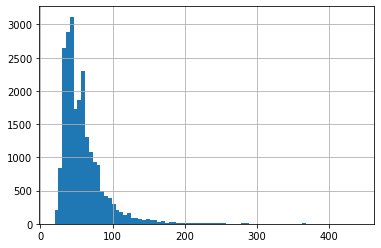

In [73]:
#изучим общую площадь квартир
#большая часть квартир в отметке где-то 30-60 м квадраных, что достаточно низко,если верить realty.rbc, то средняя
#площадь квартир в Москве 2020 гг , составляла 61 м квадартаный, и только потом пошла на снижение, в следующих годах.

data.total_area.hist(bins = 80)

<AxesSubplot:>

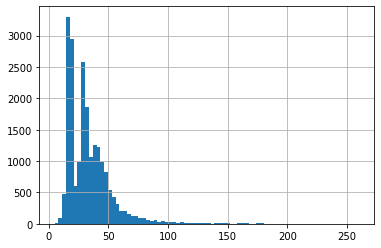

In [74]:
#изучим жилую площадь квартир   

data.living_area.hist(bins = 80)
#явно прослеживается два пика, оба приходятся на отметку от 10 до 40, значит таких квартир было много. Достаточно низкий 
#показатель,особенно если считать что пик , который самый "высокий", находится ближе к нулевой отметке


<AxesSubplot:>

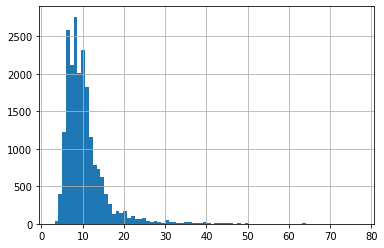

In [75]:
#изучим кухни
data.kitchen_area.hist(bins = 80)
#заметно, что подсчет кухонь максимальный на отмеке между 0 и 20, а так как он где то посередине, значит примерно 10
#метров приходилось на каждую кухню, что может означать, что людям не так уж и важна размерность кухни, для них важнее
#жилая площадь


<AxesSubplot:>

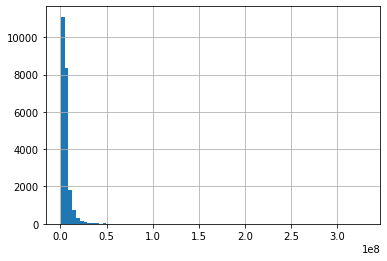

In [76]:
#изучим стоимость квартиры
data.last_price.hist(bins = 80)
#по гисторгамме заметно что квартиры стоят в большинстве случах одинаково , видимо, из за конкуретности, благодаря чему мы можем
#сделать вывод, что количество предложений не в дефиците.

<AxesSubplot:>

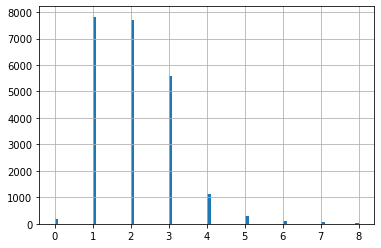

In [77]:
 #изучим количество комнат
data.rooms.hist(bins = 80)
#больше всего комнат на отметке 1 и 2, что говорит о том, что покупатель больше реагирует именно на такие варианты, а наличие
#примерно одинаковой стоимости на квартиры, говорит о том, что количество комнат в данном случае играет и роль привлечения
#внимания к определенным объявлениям: чем больше объявлений на определенную позицию, тем больше у нее покупательская способность.

<AxesSubplot:>

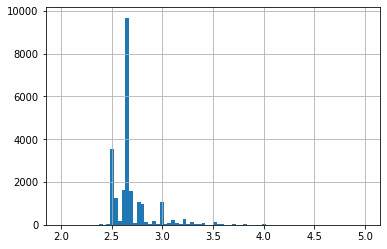

In [78]:
#изучим высоту потолков
data.ceiling_height.hist(bins = 80)
#самым высоким показателем потолка является потолок с высотой примерно 2.6 , 2.7 метров. Наверное рязница в планировке зданий.
#по этим показателям, например, мы можем установить, что планировка зданий в 2.6 метров высотой потолка, оказалась более
#популярной, чем в 2.7, это может также послужить маркетинговым "оружием".

<AxesSubplot:>

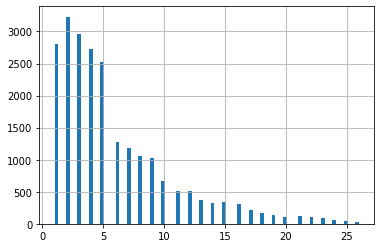

In [79]:
#изучим этаж
data.floor.hist(bins = 80)
#как видно по гисторгамме , популярностью пользуются этажи с 1 по 10, в особенности второй и третий...

<AxesSubplot:>

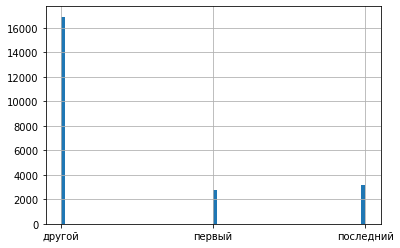

In [80]:
#изучим тип этажа квартиры   
data.floor_category.hist(bins = 80)
#мы видим, что чаще всего выставляются объявления на "другой " тип этажа, но из "первых" и "последних", предпочтительнее 
#"последние".

<AxesSubplot:>

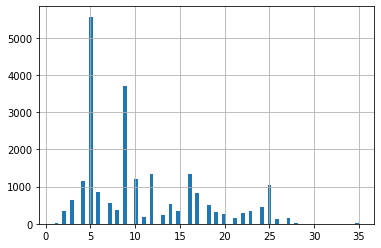

In [81]:
#изучим количество этажей
data.floors_total.hist(bins = 80)
#часто создают объявления на продажу квартир в пятиэтажных домах и девятиэтажных, что скорее связано с особенностью питерского
# менталитета: в Санкт-Петербурге большое количество кирпичных домов, что может вызывать тягу к построению домов типа "кирпичных"
#а как известно, кирпичные дома не бывают высокими, как , например, панельные дома. Также это может быть связано с разивтием 
#инфраструктуры . В любом случае, стоит изучить все факторы перед тем, как делать какие -то выводы. На гистограмме отчетливо 
#видно, что также популярны - шестнадцатиэтажки и двадцатипятиэтажки, что может говорить, что все-таки ответом является 
#постепенное развитие инфрастуктуры города.

<AxesSubplot:>

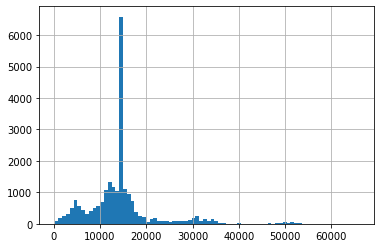

In [82]:
#изучим расстояние до центра города в метрах
data.city_centers_nearest.hist(bins = 80)
#у нас есть всего лишь один пик, и он говорит о том, что центры городов примерно одинаково удалены от квартир, и это
#может означать, что идет развитие инфраструктуры райнов и город разрастается, что говорит об экономическом развитии.
#использовать в маркентинге это можно с той точки зрения, что если количество км от центра города не влияет на спрос,
#то можно использовать это для продажи любой квартиры, важнее, как мы видели, наличие вариантов квартир по этажности
# или наличие комнат.

<AxesSubplot:>

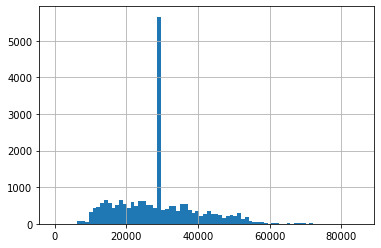

In [83]:
#изучим расстояние до близжайших аэропортов
data.airports_nearest.hist(bins = 80)
#мы можем также установить, что аэропорты находятся достаточно далеко от квартир. Если верить данным википедии
#в Санкт -Петербурге находятся всего 3 аэропорта , это может означать, что какой то определенный район в этом городе
#активно развивался в период продажи квартир за это время. Интересно , что это за регион, и процветает ли он сейчас?     

<AxesSubplot:>

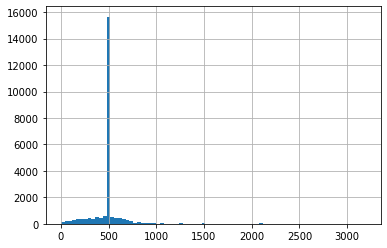

In [84]:
#изучим расстояние до близжайших парков
data.parks_nearest.hist(bins = 80)
#большинство парков находится в 500 метрах от домов квартиры которых продаются, этот показатель достаточно отчетлив 
#и на самом деле кажется что не так полезен, но на самом деле , он отлично дает понять, что является важным для людей
# которые купят этот товар: а для них важно наличие парков , мест отдыха рядом с домой, скорее всего для них и их 
#детей. Это может внести новое понимание в маркетинговую модель, если все хорошо проанализировать и сопоставить.


<AxesSubplot:>

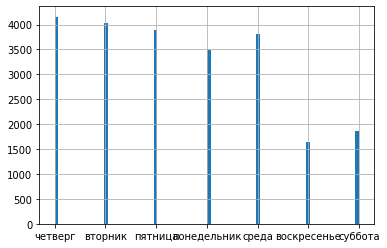

In [85]:
#рассмотрим день и месяц побликации объявления

data.weekday_exposition.hist(bins = 80)
#чаще всего публикации производились в рабочии дни недели, что довольно логично. Пиком является четверг, возможно,
#люди надеялись на быструю продажу квартиры, что связано с тем , что некоторые квартиры продавались за один день(количество 
#дней публикации), что могло бы выдать предположение, что люди чаще реагируют на объявления именно перед выходными,
#также очень полезная информация, если подумать о том, что на большинстве сайтов информация "уходит" вниз, после публикации
#какого-то количества времени, а если люди отреагировали раньше , чем она опустилась "по свежести", значит товар оказался
#успешным, что в свою очередь, говорит о том, что публиковать объявления выгоднее всего перед пятницей(первый день выходных).
#Но чтобы сделать такие выводы, хорошо было бы сопоставить скорость продажи с днем недели, потому что если скорость 
#продажи не зависит от дня недели, то скорее всего, все дело в том, что людям просто было проще выкладывать 
#такие объвления по будням.
       

<AxesSubplot:>

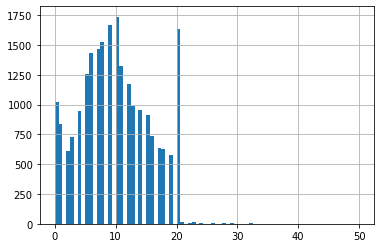

In [86]:
#достраиваем гистограммы для других столбцов
    #для total_images
data.total_images.hist(bins = 80)
#По гистограмме видно, что люди часто придерживаются какого -то точного числа фотграфий для квартир , это может быть связано 
#с чем угодно, возможно, какой -то сайт просто запрашивает 10 фотографий, а какой-то 20. Было бы интереснее в данном случае
#изучить какие квартиры продаются лучше. Судя по этой гисотграмме наличие фотографий играет значение, потому что создает
#конкуретную базу: люди будут выбирать то, что им больше понравится, из того, что есть, вряд ли кому то понравится 
#"невидимая" квартира, стоит на это акцентировать внимание!

<AxesSubplot:>

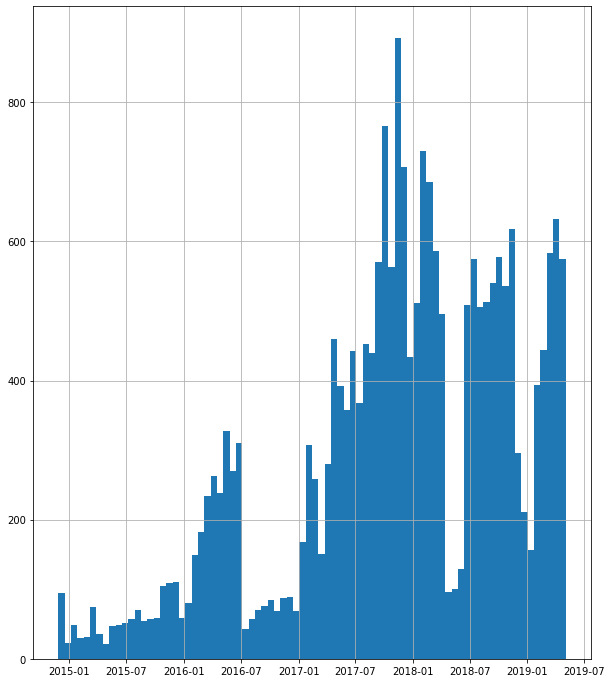

In [87]:
#для даты публикации

data.first_day_exposition.hist(bins = 80,figsize=(10,12))
#Больше всего публикаций в 2018 году.
   

<AxesSubplot:>

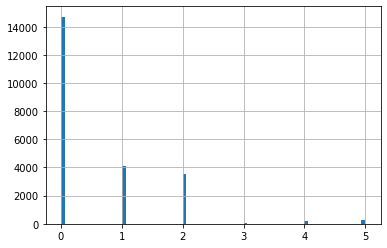

In [88]:
 #для balcony

data.balcony.hist(bins = 80)
#Больше всего квартир не имело балконов при публикации, я думаю , там где существовало от 2 до 5 балконов и было то редкое 
#количество фотографий. Однако , если серьезно, ноль говорит скорее о развитии инфраструктуры. Если верить данным о
#высотности домов, больше всего их 5 и 9 этажных, навряд ли такая планировка предусматривает большое количество балконов.
#ну и судя по всему этому, людям не так важны сами балконы как та же стоимость или этаж.
#стоит отметить, что большинство людей в принципе хорошо понимает, что в таких домах не может быть балконов,
# и даже не ожидает такого, на представляения людей часто влияет их опыт, что может сказать об уровне жизни
#людей Санкт-Петербурга.

<AxesSubplot:>

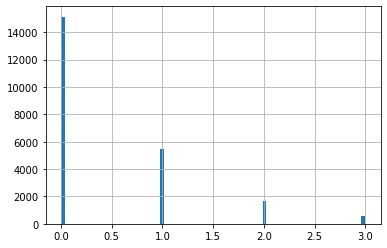

In [89]:
#для parks_around
data.parks_around.hist(bins = 80)
#количество парков рядом с квартирами достаточно скудное, чаще всего их нет. Интересно , что если они есть, то они недалеко от
#дома, что может дать информацию о том, что продажа квартир ведется в разных районах как географически так и экономически:
#возможно район, где аэропорт находится так далеко от квартир, как раз является отличным примером данного факта.

<AxesSubplot:>

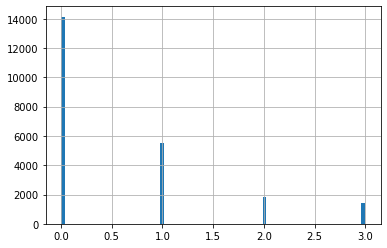

In [90]:
#для ponds_around

data.ponds_around.hist(bins = 80)
#С прудами ситуация похожая, как и с парками
   

<AxesSubplot:>

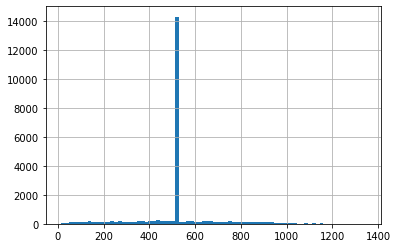

In [91]:
 #для ponds_nearest

data.ponds_nearest.hist(bins = 80)
#Расстояние от прудов примерно такое же, как расстояние от парков.

<AxesSubplot:>

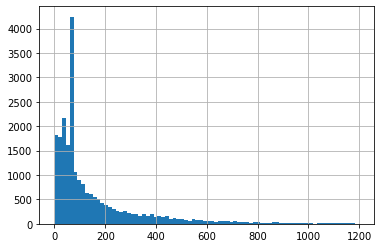

In [92]:
 #для days_exposition

data.days_exposition.hist(bins = 80)


<AxesSubplot:>

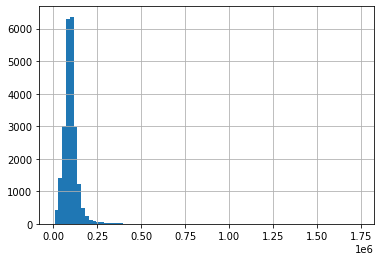

In [93]:
#для price_per_square_meter
data.price_per_square_meter.hist(bins = 80)
#Обычно объявление "висит" не дольше пары лет. Однако "свежие" объявления быстрее снимаются, как мы это обсудили выше:
#это может быть связано с работой сайтов, где они публикуются, ну и также с тем, что люди тоже могут видеть дату публикации
#и проще доверяют тем объявлениям, которые были опубликованы недавно, потому что это увеличивает их шанс приобрести 
#товар, и не потерять при этом время и нервы.Покупая товар , люди же не только его покупают, они еще и тратят свои силы и нервы,
#поэтому часто пытаются свести "плохой" опыт к минимуму.


In [94]:
mean=data['days_exposition'].mean()
median=data['days_exposition'].median()
print(mean,median)



161.80698304492222 73.0


0.6845787716812461


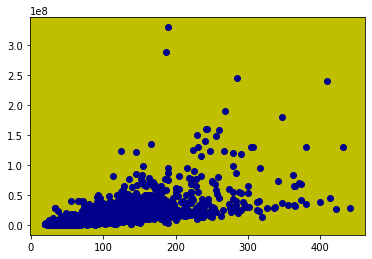

In [95]:
#изучим факторы влияния на общую стоимость квартир

        #насколько фактор общей площади повлиял на стоимость квартир
pivot_table_total_area = (
    data.pivot_table(index='total_area', values='last_price', aggfunc = 'count')
    
)
fig, ax = plt.subplots()
plt.scatter(data['total_area'],data['last_price'],c='DarkBlue')
ax.set_facecolor('y')

#стоимость немного увеличивается при увеличении квадратных метров квартир, зависимость наблюдается.
print(data['total_area'].corr(data['last_price']))

0.6009227607353879


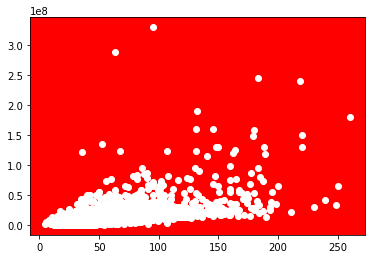

In [96]:
    #насколько фактор жилой площади повлиял на стоимость квартир
pivot_table_living_area = (
    data.pivot_table(index='living_area', values='last_price', aggfunc = 'count')
)



fig, ax = plt.subplots()
plt.scatter(data['living_area'],data['last_price'],c='w')
ax.set_facecolor('r')


#стоимость идет равномерно, зависимости не наблюдается.
print(data['living_area'].corr(data['last_price']))

0.5147634384088591


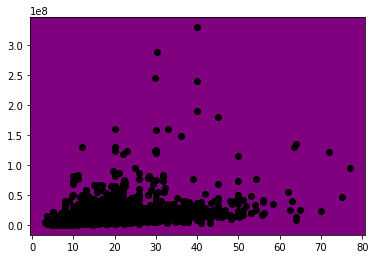

In [97]:
   #насколько фактор кухонной площади повлиял на стоимость квартир
pivot_table_kitchen_area = (
    data.pivot_table(index='kitchen_area', values='last_price', aggfunc = 'count')
   
)
fig, ax = plt.subplots()
plt.scatter(data['kitchen_area'],data['last_price'],c='k')
ax.set_facecolor('purple')


#фактор кухонной площади повлиял так: распределение идет равномерно, зависимости от цены не наблюдается сильной.
print(data['kitchen_area'].corr(data['last_price']))

0.39856456468902973


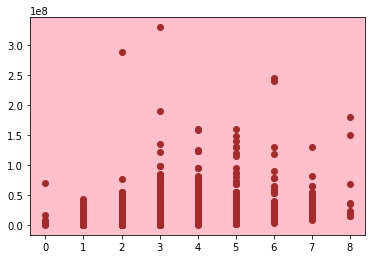

In [98]:
#насколько фактор количества комнат повлиял на стоимость квартир
     

pivot_table_rooms = (
    data.pivot_table(index='rooms', values='last_price', aggfunc = 'count')
)
fig, ax = plt.subplots()
plt.scatter(data.rooms,data.last_price,c='brown')
ax.set_facecolor('pink')



print(data['rooms'].corr(data['last_price']))
#фактор количества комнат повлиял так: там где есть увеличнение комнат больше 1 идет увеличение стоимости, пиком является пять
#снижение-к 10.


<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера в4</b></font>
    <br /> 
    <font size="3", color = "black">
<br />при изучении зависимости мы рассчитываем коэффициент корреляции, для проверки наличия линейной зависимости
        
стоит добавить расчет

<Figure size 576x360 with 0 Axes>

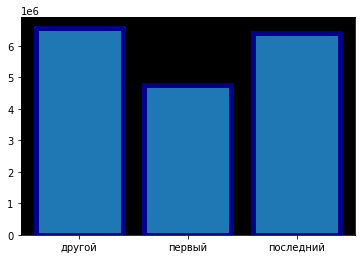

In [99]:
#насколько фактор категории этажей повлиял на стоимость квартир

plt.figure(figsize=(8,5))
pivot_table_floor_category = (
    data.pivot_table(index='floor_category', values='last_price', aggfunc = 'mean')
    .reset_index()
)
fig, ax = plt.subplots()
plt.bar(pivot_table_floor_category['floor_category'],pivot_table_floor_category['last_price'],edgecolor = 'darkblue',
       linewidth = 5)
ax.set_facecolor('black')


#фактор категории этажей повлиял так, что цена установлена ниже всего на 1 этажи , взаимосвязь есть.


In [105]:
data['floor_category']

0        другой
1        первый
2        другой
3        другой
4        другой
          ...  
23694    другой
23695    другой
23696    первый
23697    другой
23698    первый
Name: floor_category, Length: 22884, dtype: object

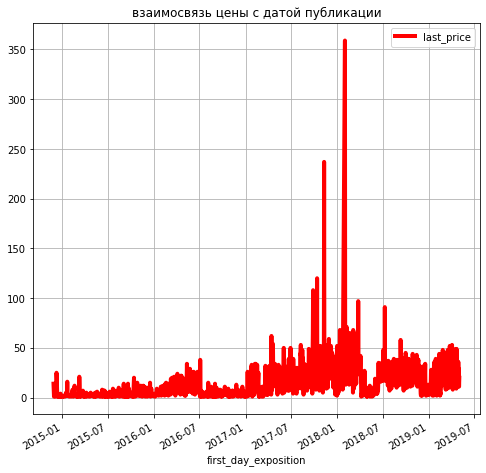

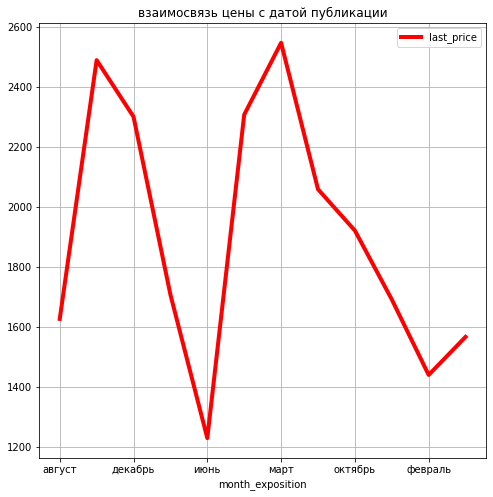

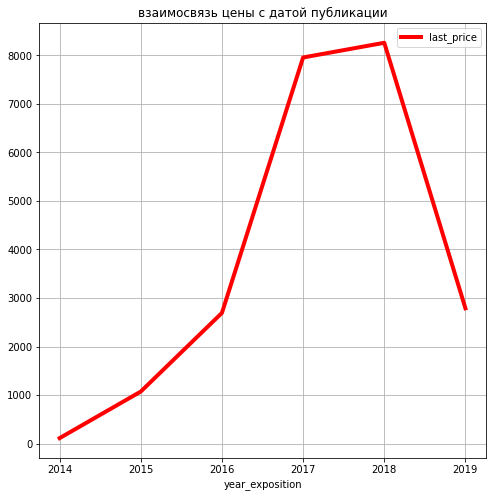

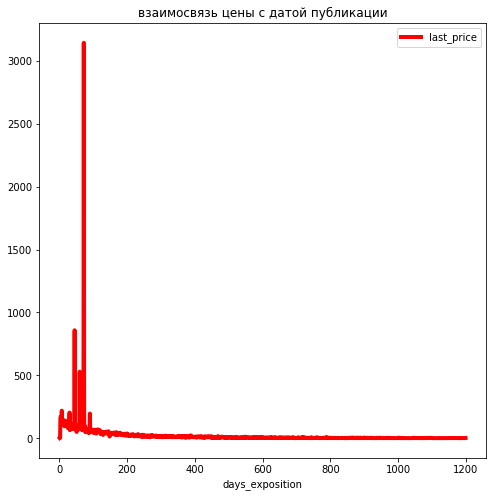

In [100]:
 #насколько фактор даты публикации повлиял на стоимость квартир
    
pivot_table_first_day_exposition = (
    data.pivot_table(index='first_day_exposition', values='last_price', aggfunc = 'count')
    .plot(y='last_price', title='взаимосвязь цены с датой публикации', figsize=(8, 8), grid=True,color='r',linewidth = 4)
)
    
pivot_table_first_day_exposition = (
    data.pivot_table(index='month_exposition', values='last_price', aggfunc = 'count')
    .plot(y='last_price', title='взаимосвязь цены с датой публикации', figsize=(8, 8), grid=True,color='r',linewidth = 4)
)
    
pivot_table_first_day_exposition = (
    data.pivot_table(index='year_exposition', values='last_price', aggfunc = 'count')
    .plot(y='last_price', title='взаимосвязь цены с датой публикации', figsize=(8, 8), grid=True,color='r',linewidth = 4)
)
pivot_table_first_day_exposition = (
    data.pivot_table(index='days_exposition', values='last_price', aggfunc = 'count')
    .plot(y='last_price', title='взаимосвязь цены с датой публикации', figsize=(8, 8), grid=True,color='r',linewidth = 4)
)
pivot_table_first_day_exposition.grid(color = 'blue',   
        linewidth = 2,   
        linestyle = '--')


#фактор даты публикации повлиял так: самые дорогие квартиры 2018 год, зависомость есть.  


<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера в4</b></font>
    <br /> 
    <font size="3", color = "black">
<br />стоит как в примере изучения изменение цены в зависимости от удаленности от центра, сгруппировать данные три раза: по дням, месяца и годам и построить три отдельных графика ...

  locality_name          mean  count
9        Выборг  58625.201194    229      locality_name           mean  count
0  Санкт-Петербург  114528.350965  15183


Text(0, 0.5, 'Стоимость')

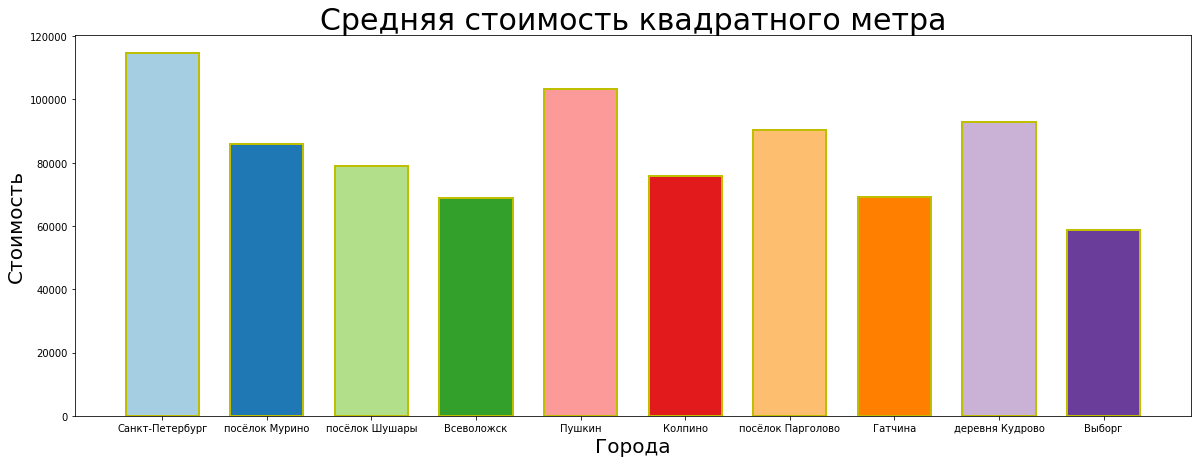

In [101]:
 #находим среднюю стоимость м² у 10 населенных пунктов с самым выским количеством объявлений

locality_m = data.pivot_table(index = 'locality_name',values = 'price_per_square_meter',aggfunc= ['mean','count'])
locality_m.columns= ['mean','count']
locality_m = locality_m.sort_values('count',ascending=False).head(10)
locality_m = locality_m.reset_index()

locality_min = data.pivot_table(index = 'locality_name',values = 'price_per_square_meter',aggfunc= ['mean','min'])
lmax=locality_m[locality_m['mean']==locality_m['mean'].max()]
lmin =locality_m[locality_m['mean']==locality_m['mean'].min()]
print(lmin,lmax)#самая низкая и самая высокая стоимость м² н.п.




x = locality_m['locality_name']
y = locality_m['mean']
plt.figure(figsize=[20, 7])
col_map = plt.get_cmap('Paired')

plt.bar(x, y, width=0.7, color=col_map.colors, edgecolor='y', 
        linewidth=2)

plt.title('Средняя стоимость квадратного метра', fontsize=30)
plt.xlabel('Города', fontsize=20)
plt.ylabel('Стоимость', fontsize=20)






<Figure size 576x360 with 0 Axes>

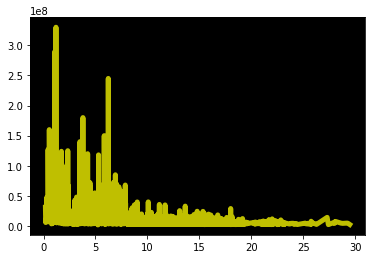

In [102]:
locality_km =(
 data.query('locality_name == "Санкт-Петербург"')
    .groupby('city_centers_nearest_km')['last_price'].mean() 
)
locality_km.columns=['km', 'mean_price']

plt.figure(figsize=(8,5))

fig, ax = plt.subplots()
plt.plot(locality_km, linewidth = 5,color='y')

ax.set_facecolor('black')


#Стоимость достаточно высока там, где квартира расположена рядом с центром, что определяется наличием инфраструктуры города,
#Так что, сэконмить можно, купив квартиру подальше от центра города, и корреляция в данном случае положительная:
#чем дальше от центра города квартира, тем ниже ее стоимость.

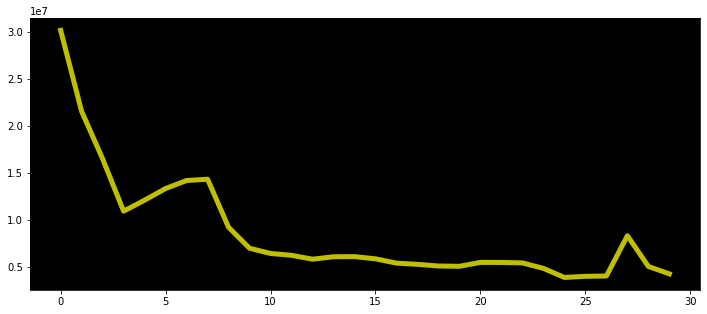

In [103]:
data['city_centers_nearest_km'] = data['city_centers_nearest_km'].round()

locality_km =(
 data.query('locality_name == "Санкт-Петербург"')
    .groupby('city_centers_nearest_km')['last_price'].mean() 
)
locality_km.columns=['km', 'mean_price']

# plt.figure(figsize=(8,5))

fig, ax = plt.subplots(figsize=(12,5))
plt.plot(locality_km, linewidth = 5,color='y')

ax.set_facecolor('black');


#Стоимость достаточно высока там, где квартира расположена рядом с центром, что определяется наличием инфраструктуры города,
#Так что, сэконмить можно, купив квартиру подальше от центра города, и корреляция в данном случае положительная:
#чем дальше от центра города квартира, тем ниже ее стоимость.

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера в4</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> осталось округлить параметр
        
        data['city_centers_nearest_km'] = data['city_centers_nearest_km'].round()

<div class="alert alert-
            danger">
<font size="4"><b>❌ Комментарий ревьюера в3</b></font>
    <br /> 
    <font size="3", color = "black">
<br />          
Осталось добавить отдельных графиков и изменить 
        
Шаг 4. Проведите исследовательский анализ данных:
1.	Изучите следующие параметры объектов:
    +	общая площадь;
    +	жилая площадь;
    +	площадь кухни;
    +	цена объекта;
    +	количество комнат;
    +	высота потолков;
    +	этаж квартиры;
    +	тип этажа квартиры («первый», «последний», «другой»);
    +	общее количество этажей в доме;
    +	расстояние до центра города в метрах;
    +	расстояние до ближайшего аэропорта;
    +	расстояние до ближайшего парка;
    +	день и месяц публикации объявления.


__Постройте отдельные гистограммы для каждого из этих параметров.__ Опишите все ваши наблюдения по параметрам в ячейке с типом markdown.        

<div class="alert alert-
            danger">
<font size="4"><b>❌ Комментарий 
    ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />      
        
Шаг 4. Проведите исследовательский анализ данных:

3.	Какие факторы больше всего влияют на общую (полную) стоимость объекта?
    Изучите, зависит ли цена от:
    +	общей площади;
    +	жилой площади;
    +	площади кухни;
    +	количества комнат;
    +	этажа, на котором расположена квартира (первый, последний, другой);
    +	даты размещения (день недели, месяц, год).
    
Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.
        
        
__Советы по графикам:__
        
+ зависимость параметров (от площади, числа комнат, удалённости от центра) оптимальнее рассматривать на точечных графиках (тип scatter), 
+ динамику на линейных (это про сравнение цен за год, месяц, день недели), 
+ сравнение цен на барах (для сравнение средней стоимости квартиры по трем категориям)


<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера в3</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> пример для графика в п.4.1

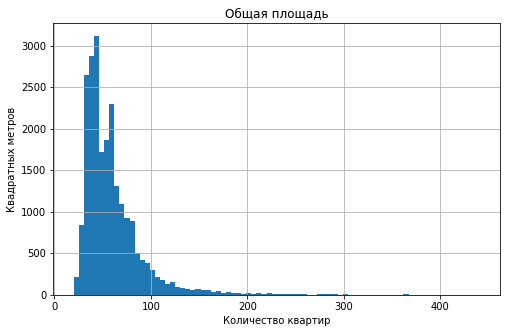

In [104]:
#изучим общую площадь квартир
plt.figure(figsize=(8,5))
data.total_area.hist(bins = 80)


plt.title("Общая площадь")
plt.xlabel('Количество квартир')
plt.ylabel('Квадратных метров');

#по этой гисторгамме отчетливо видно что большая часть квартир состоит из 30-60 квадратных метров, это можно подсчитать
#отдельно, и выйдет 12.859 кв

<div class="alert alert-
            danger">
<font size="4"><b>❌ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />  Осталось пересчитать: сначала составляем список из десяти населенных пунктов в которых наибольшее кол-во объявлений, затем рассчитываем среднюю  стоимость кв. м., затем строим график (бары), чтобы наглядно показать разницу в средней цене кв. метра ...
        
Шаг 4. Проведите исследовательский анализ данных:

4.	Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах __с наибольшим числом объявлений.__ Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.
        
        


<div class="alert alert-
            danger">
<font size="4"><b>❌ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Для выполнения 5-го пункта стоит сгруппировать и найти среднюю стоимость квартиры на каждом километре, на этих данных построить линейный график
        
        5.	Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.
        

### Общий вывод

Продажа квартиры обычно занимает 169 дней. Слишком долгими, по моему мнению считаются продажи , которые длились более четырех лет. Также считаю, что продажи от двух дней до 7 дней выглядят немного подозрительно. Видимо у них была хорошая реклама.
Также могу сказать, что самое большое количество публикаций наблюдается в Санкт-Петербурге, но даже там люди предпочитают покупать 50 квадратов жилой площади, из-за чего стоимость на нее растет. Также стоимость растет на однокомнатные квартиры.
Противоположная тенденция наблюдается в стоимости км вдали от центра города. Скорее всего, это связано с тем, что дальние квартиры от центра покупают гораздо меньше. Одна и та же тендеция на разных показателях, и мы ее выявили и обосновали. Мы очистили данные от выбивающихся значений и аномалий, некоторые из которых было сложно не заметить, что не скажешь о неявных дубликатах, которые было достаточно сложно обнаружить из -за количества текстовых данных вразнобой. Думаю, мы хорошо потрудились.

P.S.
Впредь , выбирая квартиры останавливаемся на 60 метрах...Так дешевле


<div class="alert alert-
            danger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> К сожалению, на проекте закомментирована большая часть кода из основного шага №4
        
Недоделаный проект был отправлен случайно? Тогда поправь его, пожалуйста, и возвращайся.
Или ты не понимаешь, как выполнить эти шаги? Тогда стоит задать вопрос преподавателю по проектам в чате slack. Также ты можешь написать вопрос в проекте и опять отправить его на проверку — так я смогу тебе ответить.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод